In [1]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def exponential(l):
    u = random.random()
    return -math.log(u)/l

In [14]:
lambda_a = 2
lambda_d = 1.5
queue=0
t=0
task_t=exponential(lambda_a)
serwer_t=exponential(lambda_d)
t_max=10
executed=0
results={"queue":[],"send": [],"executed":[]}
send=0
while(t<t_max):
    if(task_t<=0):
        task_t=exponential(lambda_a)
        queue+=1
        send+=1
    if(queue>0):
        if(serwer_t<=0):
            serwer_t=exponential(lambda_d)
            queue-=1
            executed+=1
        serwer_t-=1/60
    task_t-=1/60
    t+=1/60
    results["queue"].append(queue)
    results["executed"].append(executed)
    results["send"].append(send)

time_waited=[]    
tasks = set(results["executed"])
tasks.remove(0)
for t in tasks:
    t_send = results["send"].index(t)
    t_exec = results["executed"].index(t)
    time_waited.append((t_exec-t_send)/60)
    

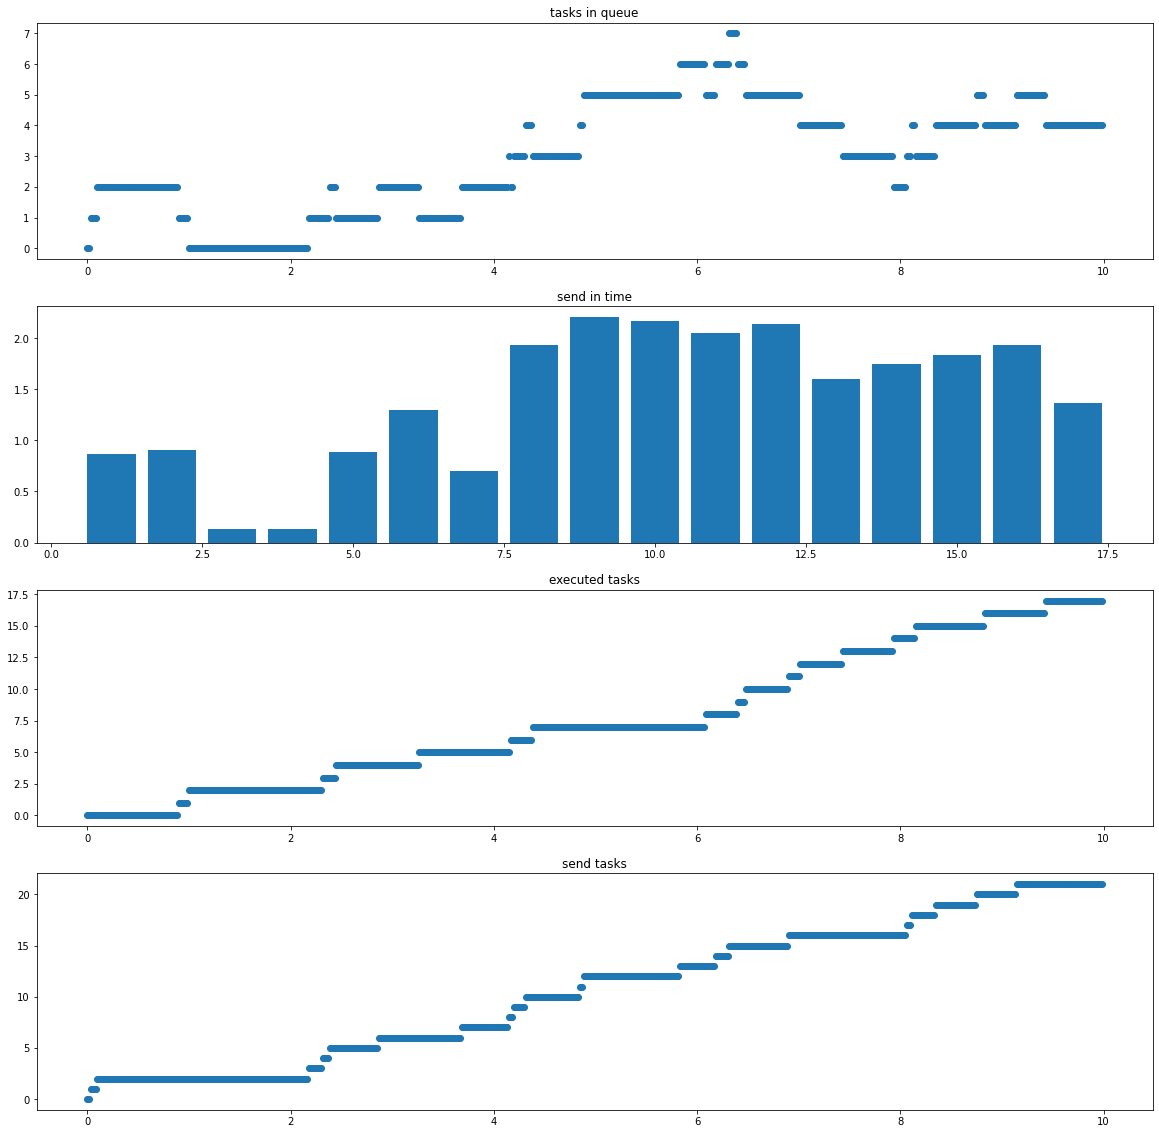

In [15]:
plots = len(results.keys())
fig,ax = plt.subplots(plots+1,figsize=(20,20))

ax[0].set_title("tasks in queue")
ax[0].scatter([i/60 for i in range(0,t_max*60)],results["queue"])
ax[1].set_title("send in time")
ax[1].bar(list(tasks),time_waited)
ax[2].set_title("executed tasks")
ax[2].scatter([i/60 for i in range(0,t_max*60)],results["executed"])
ax[3].set_title("send tasks")
ax[3].scatter([i/60 for i in range(0,t_max*60)],results["send"])